# Introduction

Goal of this project is to analyze the number of building permit applications submitted for approval regarding construction of new housing units within the state of Massachusetts.

The intent is to scope, prepare, plot data and seek out any trends apparent from the analysis.

### Analysis Goals

- How was the pandemic, supply chain issues and inflation affected the number of residential building permit applications the state of Massachusetts have seen?

- Have certain areas boomed prior to the pandemic and then never returned?

- Have certain areas seen a low demand but then increase since all of these issues noted above?

### Data sources:

The data was obtained from the U.S. Census Bureau webpage: https://www2.census.gov/econ/bps/Place/

Data (in csv format) was downloaded from the northeastern region of the United States between the years 2018 - 2021. Each seperate csv file represent survey data collected by the census bureau for each month.

# Python Module Import

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gdp
import os, glob

# Initial Data Inspection

In [2]:
sample = pd.read_csv(r'C:\Users\sjauy\Python\HODP\building_permit_analysis\permit_env\csv_data\monthly_data\ne2001c.txt')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sample.head()

,Survey,State,6-Digit,County,Census Place,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Footnote,Central,Zip,Region,Division,Source,Place,Unnamed: 17,1-unit,Unnamed: 19,Unnamed: 20,2-units,Unnamed: 22,Unnamed: 23,3-4 units,Unnamed: 25,Unnamed: 26,5+ units
Date,Code,ID,Code,Code,Code,Code,,Code,Code,Code,City,Code,Code,Code,Code,Name,Bldgs,Units,Value,Bldgs,Units,Value,Bldgs,Units,Value,Bldgs,Units,Value
202001,09,001000,013,,00000,01080,3303,278,25540,,,06232,1,1,3,Andover town,0,0,0,0,0,0,0,0,0,0,0,0
202001,09,013000,003,,00000,02060,18098,278,25540,,,06001,1,1,1,Avon town,0,0,0,0,0,0,0,0,0,0,0,0
202001,09,029000,003,,00000,04300,19866,278,25540,,,06037,1,1,3,Berlin town,0,0,0,0,0,0,0,0,0,0,0,0
202001,09,037000,001,,00000,04720,18584,408,14860,,,06801,1,1,5,Bethel town,4,4,1224766,0,0,0,0,0,0,0,0,0


In [5]:
sample.to_csv(r'C:\Users\sjauy\Python\HODP\building_permit_analysis\permit_env\test.csv',header = True)

We see that due to heading format in txt file, part of the column name imports as a row of data. We will need to combine all files into data frame, rename columns and delete rows with the column info in it.

### Combining all txt files into data frame

In [6]:
#Define folder pather containing txt data files
files_folder = r'C:\Users\sjauy\Python\HODP\building_permit_analysis\permit_env\csv_data\monthly_data'
files = []

In [7]:
#Create dataframe list using list comprehension for all csv files in project folder
#Skipinitialspace command removes all the unnecessary blank white spaces within each cell
files = [pd.read_csv(file, delimiter = ',', skipinitialspace = True)\
         for file in glob.glob(os.path.join(files_folder, '*.txt'))]

In [8]:
#Creating column names in correct order
column_names = ['date','State','6-Digit','County','Census Place','FIPS Place', \
                'FIPS MCD','Pop','CSA','CBSA','Footnote','Central','Zip','Region', \
                'Division','Source','Place','1-unit_bldgs','1-unit_units','1-unit_value',\
                '2-units_bldgs','2-unit_units','2-unit_value',\
                '3-4-units_bldgs','3-4-unit_units','3-4-unit_value',\
                '5_plus-units_bldgs','5_plus-units_units','5_plus-units_value']

In [9]:
raw_files_df = pd.concat(files).reset_index()

In [10]:
#renaming column names to correct order
raw_files_df.columns = column_names

In [11]:
raw_files_df.head()

,date,State,6-Digit,County,Census Place,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Footnote,Central,Zip,Region,Division,Source,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value
0,Date,Code,ID,Code,Code,Code,Code,NaN,Code,Code,Code,City,Code,Code,Code,Code,Name,Bldgs,Units,Value,Bldgs,Units,Value,Bldgs,Units,Value,Bldgs,Units,Value
1,201801,09,001000,013,NaN,00000,01080,3303.0,278,25540,NaN,NaN,06232,1,1,3,Andover town,0,0,0,0,0,0,0,0,0,0,0,0
2,201801,09,013000,003,NaN,00000,02060,18098.0,278,25540,NaN,NaN,06001,1,1,3,Avon town,0,0,0,0,0,0,0,0,0,0,0,0
3,201801,09,029000,003,NaN,00000,04300,19866.0,278,25540,NaN,NaN,06037,1,1,5,Berlin town,1,1,184235,0,0,0,0,0,0,0,0,0
4,201801,09,037000,001,NaN,00000,04720,18584.0,408,14860,NaN,NaN,06801,1,1,1,Bethel town,13,13,4882625,0,0,0,0,0,0,0,0,0


In [12]:
#removing first row of data that contains column name info
files_df = raw_files_df[raw_files_df.date != 'Date']

In [13]:
files_df.head()

,date,State,6-Digit,County,Census Place,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Footnote,Central,Zip,Region,Division,Source,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value
1,201801,09,001000,013,NaN,00000,01080,3303.0,278,25540,NaN,NaN,06232,1,1,3,Andover town,0,0,0,0,0,0,0,0,0,0,0,0
2,201801,09,013000,003,NaN,00000,02060,18098.0,278,25540,NaN,NaN,06001,1,1,3,Avon town,0,0,0,0,0,0,0,0,0,0,0,0
3,201801,09,029000,003,NaN,00000,04300,19866.0,278,25540,NaN,NaN,06037,1,1,5,Berlin town,1,1,184235,0,0,0,0,0,0,0,0,0
4,201801,09,037000,001,NaN,00000,04720,18584.0,408,14860,NaN,NaN,06801,1,1,1,Bethel town,13,13,4882625,0,0,0,0,0,0,0,0,0
5,201801,09,045000,003,NaN,00000,05910,20486.0,278,25540,NaN,NaN,060022460,1,1,1,Bloomfield town,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
files_df['date'] = pd.to_datetime(files_df.loc[:,'date'], format = '%Y%m')

C:\Users\sjauy\AppData\Local\Temp\ipykernel_18276\539256125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df['date'] = pd.to_datetime(files_df.loc[:,'date'], format = '%Y%m')


In [15]:
files_df.drop(['Census Place', 'Footnote', 'Central','Region', 'Division', 'Source' ], axis = 1 , inplace = True)

C:\Users\sjauy\AppData\Local\Temp\ipykernel_18276\129060381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df.drop(['Census Place', 'Footnote', 'Central','Region', 'Division', 'Source' ], axis = 1 , inplace = True)


## Classifying each Place based on population size
(https://www2.census.gov/geo/pdfs/reference/GARM/Ch12GARM.pdf)

**Urbanized Areas (UAs)**
A UA is a continuously built-up area with a population of 50,000 or more.
It comprises one or more places—central place(s)—and the adjacent
densely settled surrounding area—urban fringe—consisting of other
places and nonplace territory.

**Urban Places Outside of UAs (UP)**
Outside of UAs, an urban place is any incorporated place or census designated place (CDP) with at least 2,500 inhabitants. A CDP is a densely
settled population center that has a name and community identity, and
is not part of any incorporated place (see Chapter 9, “Places”).

**Rural Places and Territory (R)**
Territory, population, and housing units that the Census Bureau does
not classify as urban are classified as rural. For instance, a rural place is
any incorporated place or CDP with fewer than 2,500 inhabitants that is
located outside of a UA. A place is either entirely urban or entirely rural,
except for those designated as an extended city.


In [16]:
files_df['classif'] = files_df['Pop'].apply(lambda val: 'UA' if val >= 50000\
                                         else ('UP' if (val >= 2500 and val < 50000)
                                         else 'R'))

C:\Users\sjauy\AppData\Local\Temp\ipykernel_18276\1135980161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df['classif'] = files_df['Pop'].apply(lambda val: 'UA' if val >= 50000\


In [17]:
files_df.head()

,date,State,6-Digit,County,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Zip,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value,classif
1,2018-01-01,09,001000,013,00000,01080,3303.0,278,25540,06232,Andover town,0,0,0,0,0,0,0,0,0,0,0,0,UP
2,2018-01-01,09,013000,003,00000,02060,18098.0,278,25540,06001,Avon town,0,0,0,0,0,0,0,0,0,0,0,0,UP
3,2018-01-01,09,029000,003,00000,04300,19866.0,278,25540,06037,Berlin town,1,1,184235,0,0,0,0,0,0,0,0,0,UP
4,2018-01-01,09,037000,001,00000,04720,18584.0,408,14860,06801,Bethel town,13,13,4882625,0,0,0,0,0,0,0,0,0,UP
5,2018-01-01,09,045000,003,00000,05910,20486.0,278,25540,060022460,Bloomfield town,0,0,0,0,0,0,0,0,0,0,0,0,UP


In [18]:
#changing all appropriate values to float values. "Errors = Ignore" insures all values that are suppose to be objects
#(e.g. city names) are still object data types.

for column in files_df.columns:
    files_df[column] = files_df[column].astype(int, errors = 'ignore')

C:\Users\sjauy\AppData\Local\Temp\ipykernel_18276\626566746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df[column] = files_df[column].astype(int, errors = 'ignore')


In [19]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115389 entries, 1 to 115436
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                115389 non-null  datetime64[ns]
 1   State               115389 non-null  int32         
 2   6-Digit             115389 non-null  int32         
 3   County              115389 non-null  int32         
 4   FIPS Place          115341 non-null  object        
 5   FIPS MCD            115321 non-null  object        
 6   Pop                 115389 non-null  int32         
 7   CSA                 115389 non-null  int32         
 8   CBSA                115389 non-null  int32         
 9   Zip                 115389 non-null  int32         
 10  Place               115389 non-null  object        
 11  1-unit_bldgs        115389 non-null  int32         
 12  1-unit_units        115389 non-null  int32         
 13  1-unit_value        115389 no

In [20]:
#Convert Survey Column to a data-time data type
files_df['year'] = pd.DatetimeIndex(files_df['date']).year
files_df['month'] = pd.DatetimeIndex(files_df['date']).month

C:\Users\sjauy\AppData\Local\Temp\ipykernel_18276\2282663045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df['year'] = pd.DatetimeIndex(files_df['date']).year
C:\Users\sjauy\AppData\Local\Temp\ipykernel_18276\2282663045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df['month'] = pd.DatetimeIndex(files_df['date']).month


In [21]:
files_df.head()

,date,State,6-Digit,County,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Zip,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value,classif,year,month
1,2018-01-01,9,1000,13,00000,01080,3303,278,25540,6232,Andover town,0,0,0,0,0,0,0,0,0,0,0,0,UP,2018,1
2,2018-01-01,9,13000,3,00000,02060,18098,278,25540,6001,Avon town,0,0,0,0,0,0,0,0,0,0,0,0,UP,2018,1
3,2018-01-01,9,29000,3,00000,04300,19866,278,25540,6037,Berlin town,1,1,184235,0,0,0,0,0,0,0,0,0,UP,2018,1
4,2018-01-01,9,37000,1,00000,04720,18584,408,14860,6801,Bethel town,13,13,4882625,0,0,0,0,0,0,0,0,0,UP,2018,1
5,2018-01-01,9,45000,3,00000,05910,20486,278,25540,60022460,Bloomfield town,0,0,0,0,0,0,0,0,0,0,0,0,UP,2018,1


According to census bureau, the state code for MA = 25. Select data only assigned to this code

In [22]:
ma_df = files_df.query('State == 25').reset_index(drop = True)

In [23]:
#Confirming state code is correct
ma_df.Place.head(20)

0       Abington town
1          Acton town
2       Acushnet town
3         Alford town
4       Amesbury Town
5        Andover town
6      Arlington town
7     Ashburnham town
8          Ashby town
9        Ashland town
10          Attleboro
11          Avon town
12          Ayer town
13       Bedford town
14    Bellingham town
15       Belmont town
16       Berkley town
17            Beverly
18     Billerica town
19             Boston
Name: Place, dtype: object

In [24]:
#Creating additional column which sums the total amount of buildings independent on the number of units a building contains
ma_df['total_buildings'] = ma_df['1-unit_bldgs'] + ma_df['2-units_bldgs']+ ma_df['3-4-units_bldgs'] \
                        + ma_df['5_plus-units_bldgs']

In [25]:
#Creating extra column adding up number of 2,3,4 unit buildings. This will help us in our analysis later on when we break 
#out our analysis in terms of single family homes, small condos, and large condos
ma_df['total_small_units'] = ma_df['2-unit_units']+ ma_df['3-4-unit_units']

In [26]:
ma_df.to_csv(r'C:\Users\sjauy\Python\HODP\building_permit_analysis\permit_env\csv_results\ma_df.csv',index=False,header = True)

In [27]:
ma_df.head()

,date,State,6-Digit,County,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Zip,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value,classif,year,month,total_buildings,total_small_units
0,2018-01-01,25,1000,23,00000,00170,15985,148,14460,2351,Abington town,0,0,0,0,0,0,0,0,0,0,0,0,UP,2018,1,0,0
1,2018-01-01,25,3000,17,00000,00380,21924,148,14460,1720,Acton town,1,1,427599,0,0,0,0,0,0,0,0,0,UP,2018,1,1,0
2,2018-01-01,25,5000,5,00000,00520,10303,148,39300,2743,Acushnet town,2,2,567000,0,0,0,0,0,0,0,0,0,UP,2018,1,2,0
3,2018-01-01,25,11000,3,00000,00975,494,999,38340,1230,Alford town,0,0,0,0,0,0,0,0,0,0,0,0,R,2018,1,0,0
4,2018-01-01,25,13000,9,01260,01260,16283,148,14460,1913,Amesbury Town,1,1,149000,0,0,0,0,0,0,0,0,0,UP,2018,1,1,0


In [28]:
#obtaining unique years in data set
years = ma_df.year.unique()
years

array([2018, 2019, 2020, 2021], dtype=int64)

In [29]:
#obtaining a count of how many urban places, urban areas and rural places there are in the data set
ma_df.query('year == 2018 and month ==1')['classif'].value_counts()

UP    159
UA     22
R       8
Name: classif, dtype: int64

In [30]:
#Determining the shape of the population within the MA data set
ma_df.query('year == 2018 and month ==1')['Pop'].describe()

count       189.000000
mean      25845.153439
std       48353.223448
min          75.000000
25%        8183.000000
50%       15873.000000
75%       28602.000000
max      617594.000000
Name: Pop, dtype: float64

# Exploratory Data Analysis

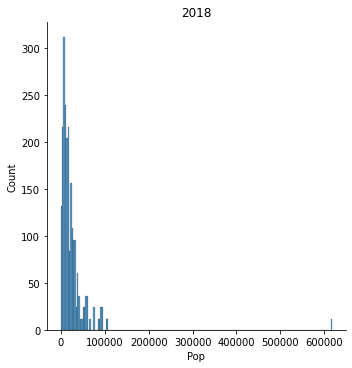

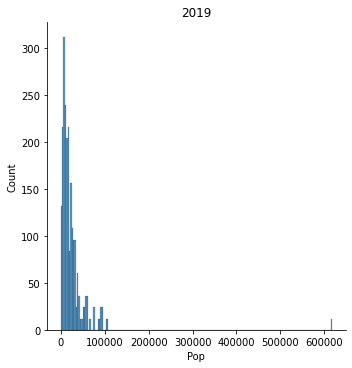

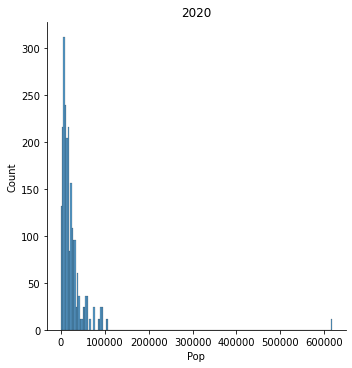

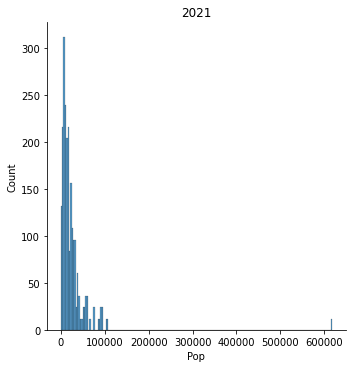

In [31]:
for i in years:
    ma_df_yr = ma_df[ma_df.year == i]
    sns.displot(ma_df_yr.Pop).set(title = i)
    plt.show()

The outlier from the figure above appears to be caused from Bostons very large population

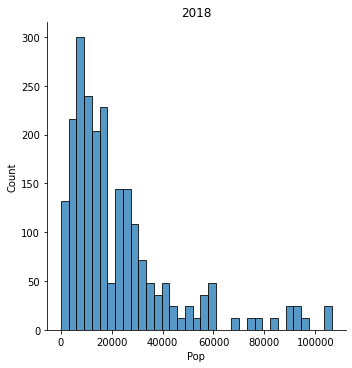

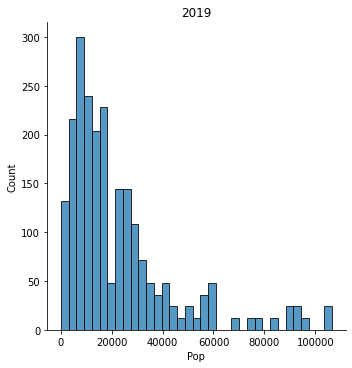

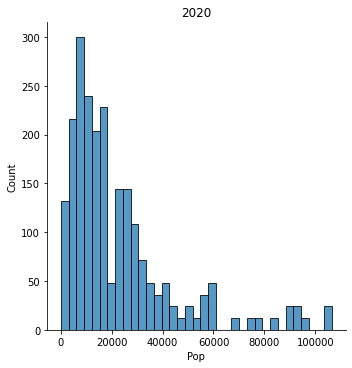

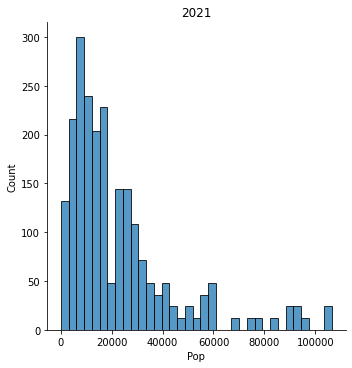

In [32]:
for i in years:
    ma_df_yr = ma_df[(ma_df.year == i) & (ma_df.Place != 'Boston')]
    sns.displot(ma_df_yr.Pop).set(title = i)
    plt.show()

### View distribution of building permits per month for each year

In [33]:
ma_df_piv = pd.pivot_table(ma_df, 
                           index = ['date','year', 'month', 'classif'], 
                           values = ['total_buildings'], aggfunc = np.sum).reset_index()

In [34]:
ma_df_piv.head()

,date,year,month,classif,total_buildings
0,2018-01-01,2018,1,R,0
1,2018-01-01,2018,1,UA,108
2,2018-01-01,2018,1,UP,245
3,2018-02-01,2018,2,R,1
4,2018-02-01,2018,2,UA,103


On March 10, 2020, Gov. Charlie Baker declared a state of emergency as cases of COIVD-19 began to spike in Massachusetts. In the year since, more than 15,000 people have died and a half a million people contracted the disease in Massachusetts alone.

Source: https://www.nbcboston.com/life-in-lockdown/life-in-lockdown-a-timeline-of-the-covid-shutdown-in-massachusetts/2320541/

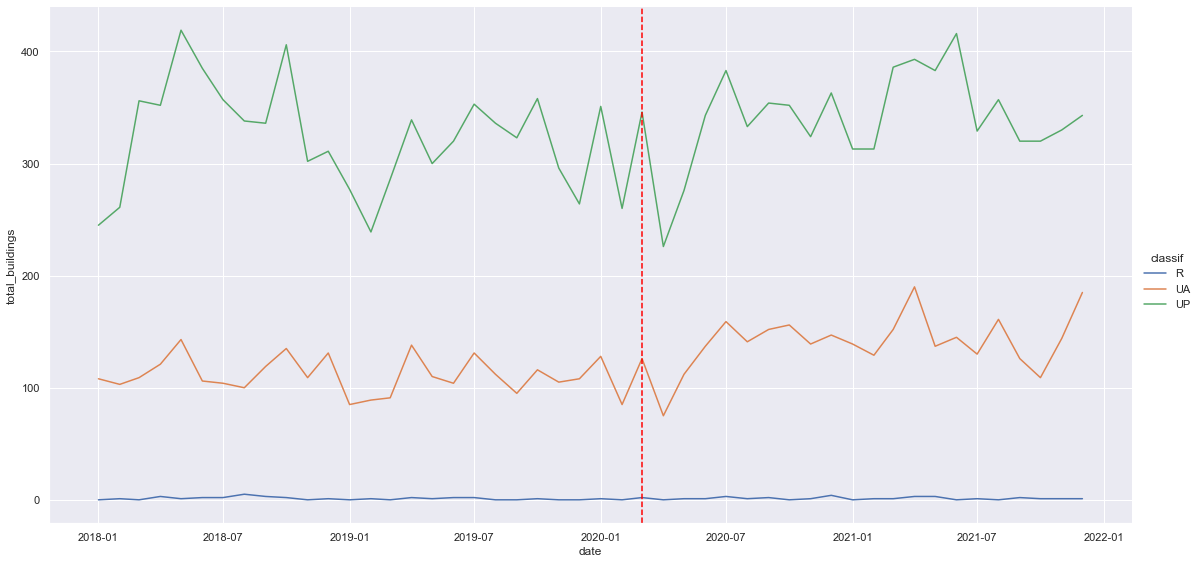

In [35]:
sns.set(style = 'darkgrid')

sns.relplot(
    data = ma_df_piv,
    x = 'date', y = 'total_buildings', hue = 'classif',
    kind = 'line',
    height = 8, aspect = 2)

plt.axvline(pd.to_datetime('2020-03-01'), color = 'red', linestyle = '--')

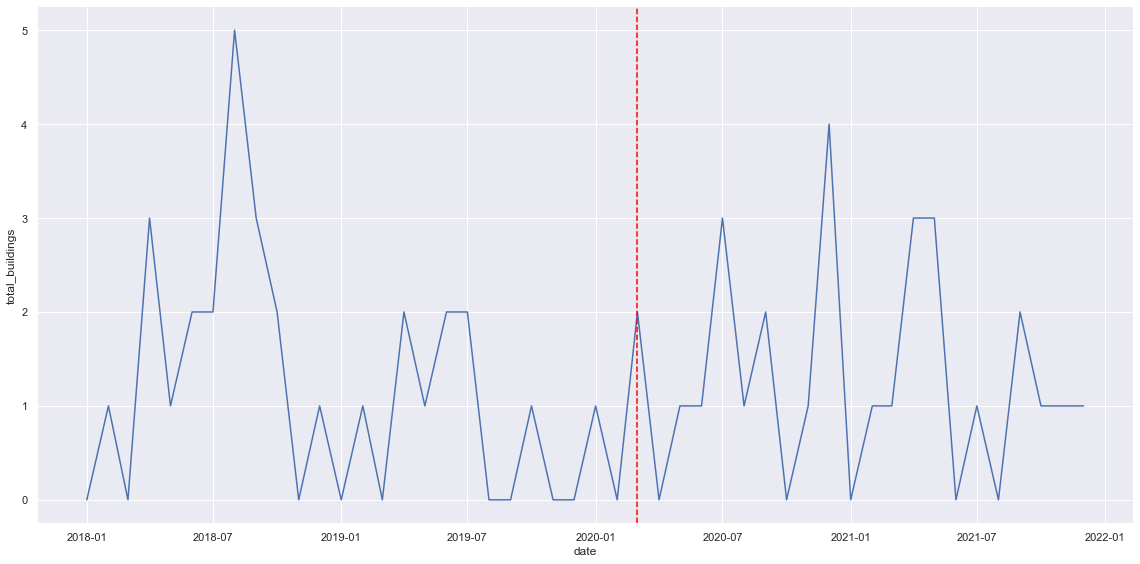

In [36]:
sns.set(style = 'darkgrid')
sns.relplot(
    data = ma_df_piv[ma_df_piv.classif=='R'],
    x = 'date', y = 'total_buildings',
    kind = 'line',
    height = 8, aspect = 2)

plt.axvline(pd.to_datetime('2020-03-01'), color = 'red', linestyle = '--')

## Analysis

First we want to grab all top ten cities / places within Massachusetts that recieved the most building permit applications throughout each year.

We will then compile the list of unique cities that made the top ten criteria and query the main data frame to show results for only these cities. This will then allow us to track the number of permit applications throughout the remaining years.

In [37]:
#obtaining unique years in data set
years = ma_df.year.unique()
years

array([2018, 2019, 2020, 2021], dtype=int64)

In [38]:
#create new dictionary, relating unique years to their own data frame (that is empty)
yeardict = {year:pd.DataFrame() for year in years}
print(yeardict)

{2018: Empty DataFrame
Columns: []
Index: [], 2019: Empty DataFrame
Columns: []
Index: [], 2020: Empty DataFrame
Columns: []
Index: [], 2021: Empty DataFrame
Columns: []
Index: []}


In [39]:
#assigning subset of main dataframe (based on specified year) to empty dataframes created in the new dictionary above
for key in yeardict.keys():
    yeardict[key] = ma_df[:][ma_df.year == key]

In [40]:
yeardict[2021].head()

,date,State,6-Digit,County,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Zip,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value,classif,year,month,total_buildings,total_small_units
6804,2021-01-01,25,1000,23,00000,00170,15985,148,14460,2351,Abington town,1,1,295385,0,0,0,0,0,0,1,5,708333,UP,2021,1,2,0
6805,2021-01-01,25,3000,17,00000,00380,21924,148,14460,1720,Acton town,2,2,778176,0,0,0,0,0,0,0,0,0,UP,2021,1,2,0
6806,2021-01-01,25,5000,5,00000,00520,10303,148,39300,2743,Acushnet town,3,3,1200000,0,0,0,0,0,0,0,0,0,UP,2021,1,3,0
6807,2021-01-01,25,11000,3,00000,00975,494,999,38340,1230,Alford town,0,0,0,0,0,0,0,0,0,0,0,0,R,2021,1,0,0
6808,2021-01-01,25,13000,9,01260,01260,16283,148,14460,1913,Amesbury Town,1,1,203242,0,0,0,0,0,0,0,0,0,UP,2021,1,1,0


In [41]:
topbuild2018 = yeardict[2018].groupby(['year','Place']).total_buildings.sum().nlargest(10)
topbuild2019 = yeardict[2019].groupby(['year','Place']).total_buildings.sum().nlargest(10)
topbuild2020 = yeardict[2020].groupby(['year','Place']).total_buildings.sum().nlargest(10)
topbuild2021 = yeardict[2021].groupby(['year','Place']).total_buildings.sum().nlargest(10)

In [42]:
topbuild = pd.concat([topbuild2018, topbuild2019, topbuild2020, topbuild2021], ignore_index = False, axis = 0)

In [43]:
topbuild

year  Place           
2018  Plymouth town       413
      Boston              237
      Hopkinton town      104
      Needham town        103
      Methuen Town         87
      Dartmouth town       70
      Lexington town       70
      Taunton              67
      Kingston town        66
      Holliston town       64
2019  Plymouth town       406
      Boston              222
      Hopkinton town      117
      Needham town        100
      Methuen Town         92
      Attleboro            86
      Franklin Town        81
      Taunton              66
      Lexington town       64
      Kingston town        63
2020  Plymouth town       435
      Medford             224
      Boston              180
      Hopkinton town      157
      Franklin Town        95
      Acton town           90
      Bridgewater Town     86
      Needham town         85
      Attleboro            82
      Taunton              81
2021  Plymouth town       520
      Medford             289
      Boston     

In [44]:
#changing grouped series into dataframe for further data processing and visualization
topbuilddf = topbuild.to_frame()

In [45]:
toptenbuildpiv = topbuilddf.pivot_table(\
                         index = 'Place',
                         columns = 'year',
                         values = 'total_buildings')

In [46]:
#create list of unique places
top_place_build = toptenbuildpiv.index.unique().tolist()

In [47]:
#query ma_df to show data for only cities that showed up in any top 10 search between years 2018-2021
ma_df_topbuild = ma_df.query('Place in @top_place_build')


In [48]:
ma_df_topbuild_piv = ma_df_topbuild.pivot_table(\
                                               index = 'Place',
                                               columns = 'year',
                                               values = 'total_buildings',
                                               aggfunc = np.sum)

In [49]:
ma_df_topbuild_piv

year,2018,2019,2020,2021
Place,,,,
Acton town,36.0,22.0,90.0,63.0
Attleboro,58.0,86.0,82.0,55.0
Boston,237.0,222.0,180.0,183.0
Bridgewater Town,NaN,48.0,86.0,55.0
Dartmouth town,70.0,55.0,44.0,34.0
Franklin Town,50.0,81.0,95.0,111.0
Holliston town,64.0,40.0,37.0,32.0
Hopkinton town,104.0,117.0,157.0,169.0
Kingston town,66.0,63.0,62.0,51.0


In [50]:
ma_df_topbuild.query('year == 2018 and month ==1')['classif'].value_counts()

UP    12
UA     4
Name: classif, dtype: int64

# Creating Data Visualizations 

Performing data visualizations for gross numbers of buildings constructed 

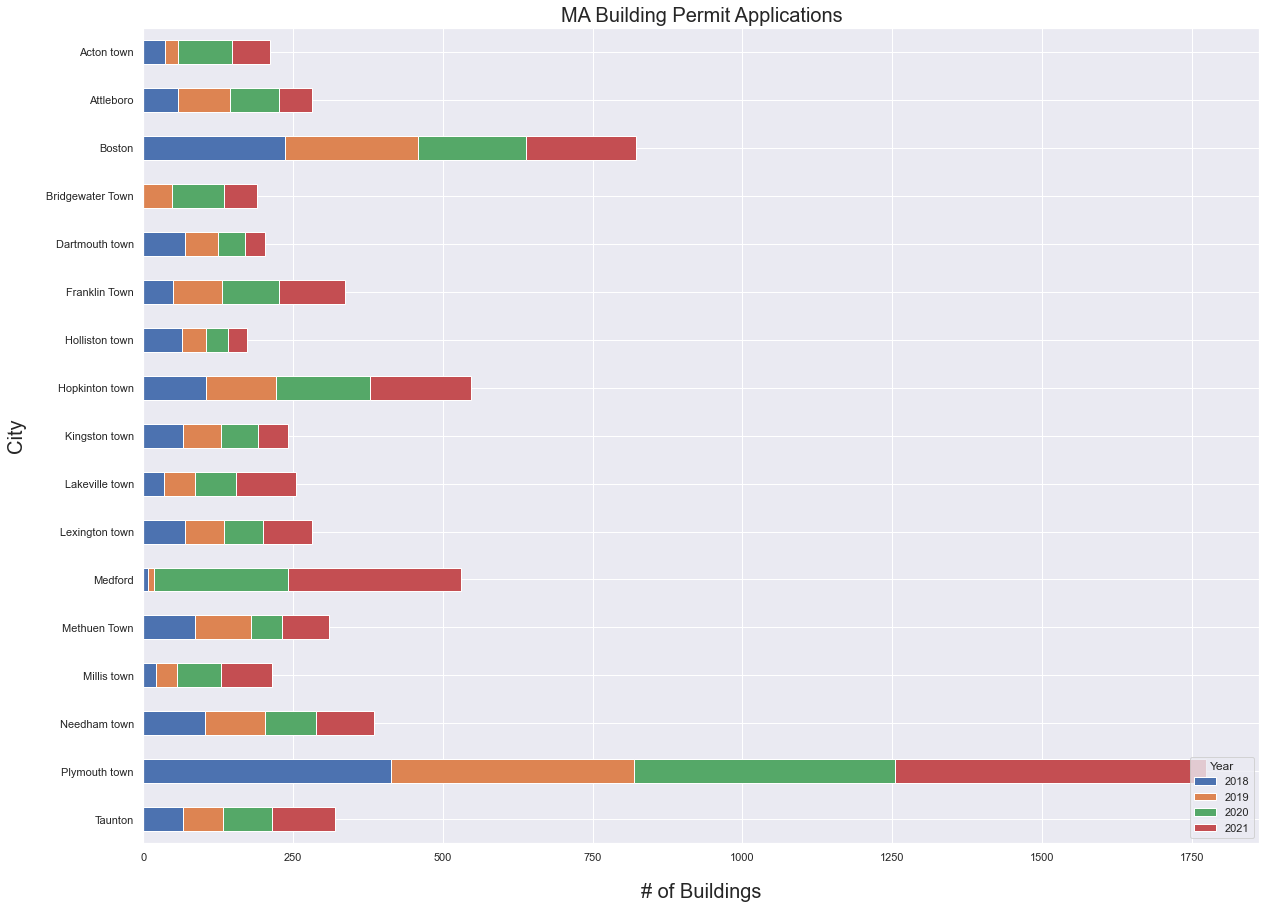

In [51]:
ax = ma_df_topbuild_piv.plot.barh(stacked = True, \
                        figsize = [20,15], \
                        title = 'MA Building Permit Applications')

ax.set_xlabel('# of Buildings', fontsize = 20, labelpad = 20 )
    #labelpad provides more space between xlabel and xticks
ax.set_ylabel('City', fontsize = 20, labelpad = 20)
plt.yticks(rotation = 0)
ax.invert_yaxis() #plots bar graph in descending order
ax.set_title('MA Building Permit Applications', fontsize = 20)
ax.legend(title = 'Year', loc = 4)

In [52]:
plt.savefig("output.jpg")

<Figure size 432x288 with 0 Axes>

In [53]:
top_places = ma_df_topbuild['Place'].unique()

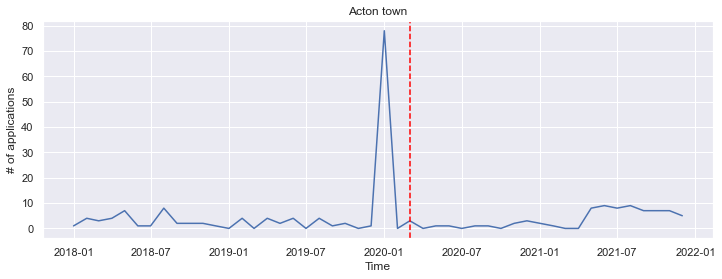

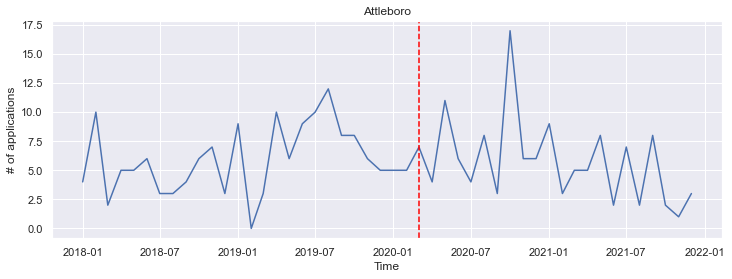

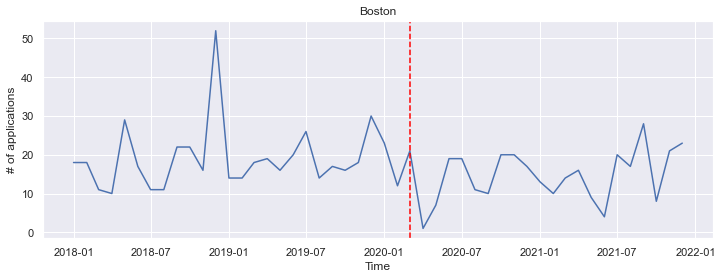

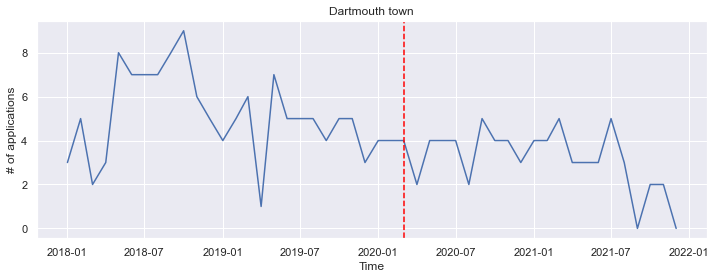

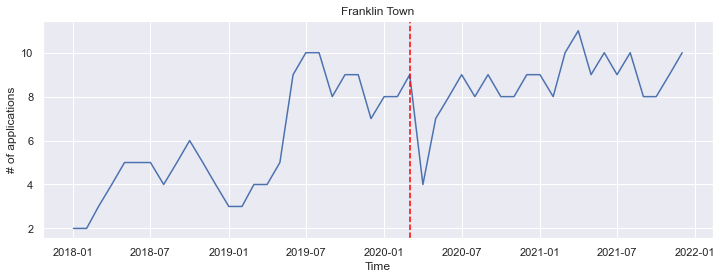

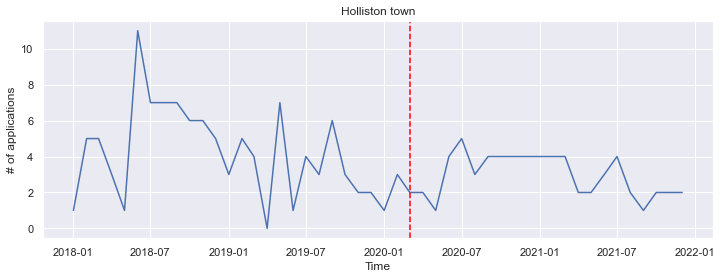

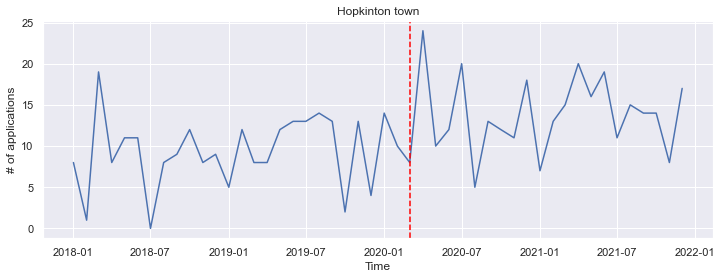

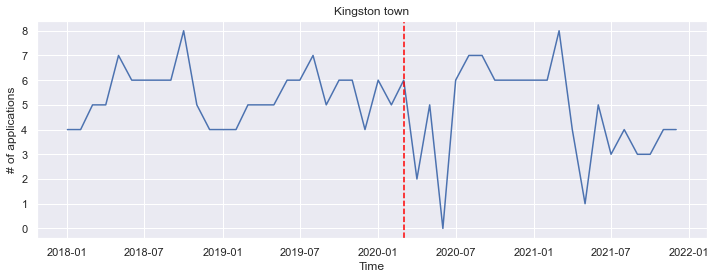

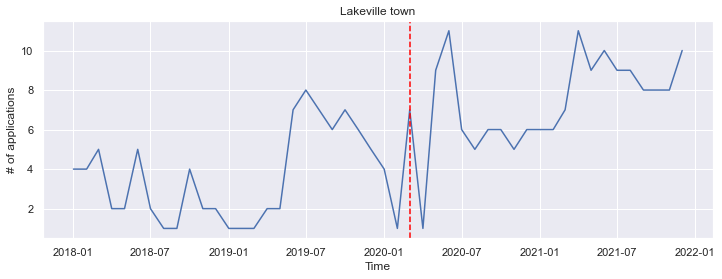

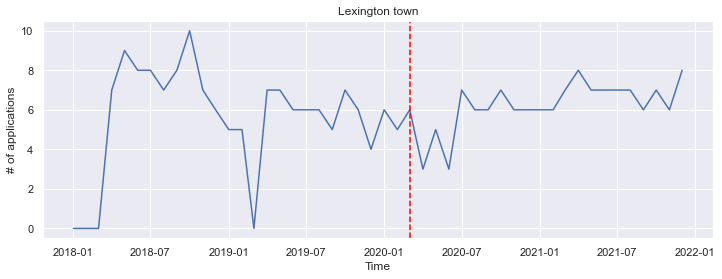

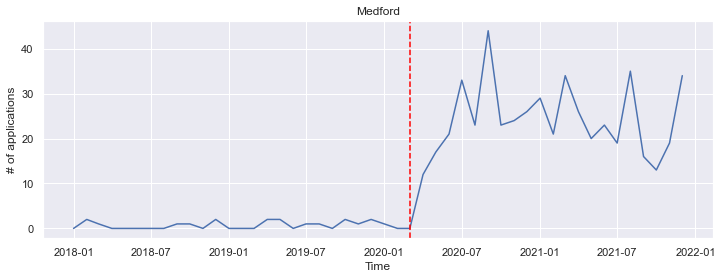

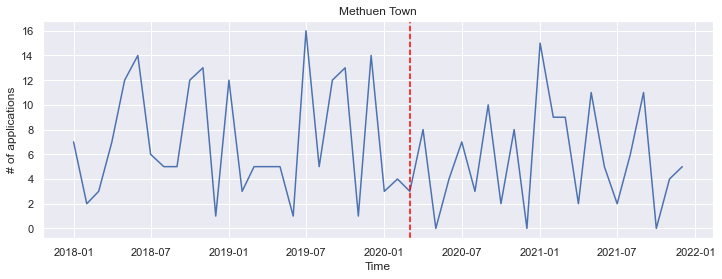

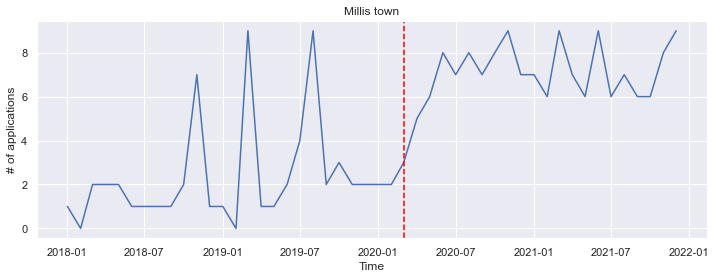

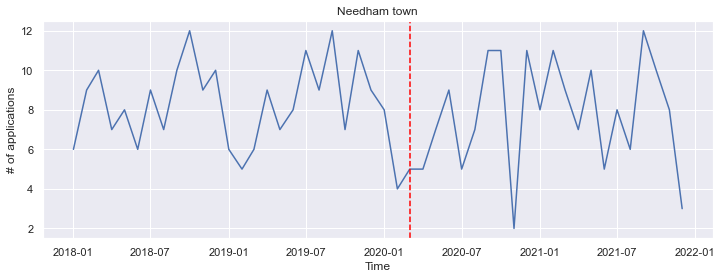

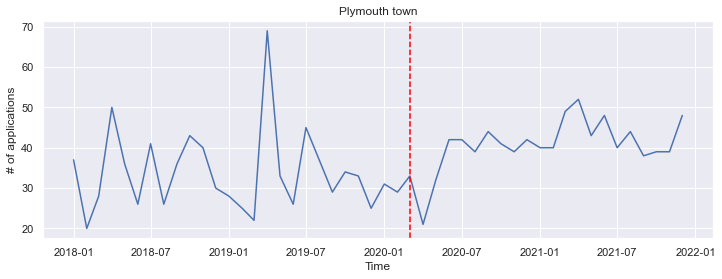

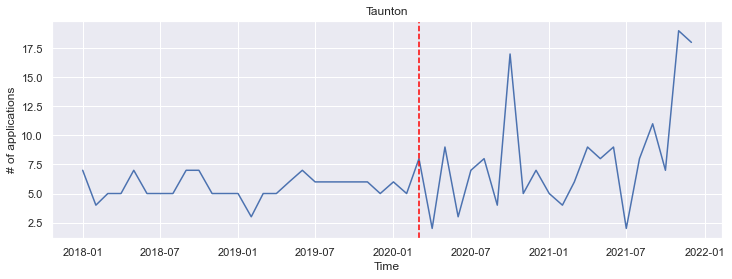

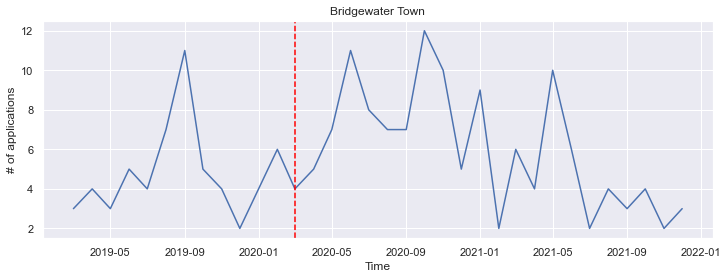

In [54]:
for i in range(len(top_places)):
    fig, ax = plt.subplots(figsize = (12,4))
    ax.plot('date', 'total_buildings', data = ma_df_topbuild[ma_df_topbuild.Place == top_places[i]])
    plt.axvline(pd.to_datetime('2020-03-01'), color = 'red', linestyle = '--')
    ax.set_xlabel('Time')
    ax.set_ylabel('# of applications')
    ax.set_title(top_places[i])

plt.show()

In [55]:
medford_df = ma_df_topbuild.query('Place == "Medford"')

In [56]:
medford_timeseries = medford_df[['date', 'total_buildings']]

In [57]:
#medford_timeseries['perc_change'] = medford_timeseries.total_buildings.pct_change()


In [58]:
medford_timeseries

,date,total_buildings
99,2018-01-01,0
288,2018-02-01,2
477,2018-03-01,1
666,2018-04-01,0
855,2018-05-01,0
1044,2018-06-01,0
1233,2018-07-01,0
1422,2018-08-01,0
1611,2018-09-01,1
1800,2018-10-01,1


In [59]:
groupby = medford_timeseries.groupby(medford_timeseries['date'].dt.year)['total_buildings'].mean()

In [60]:
groupby.to_frame()

,total_buildings
date,
2018,0.583333
2019,0.916667
2020,18.666667
2021,24.083333


In [61]:
#groupby.columns()

In [62]:
#groupby['perc_change'] = groupby.total_buildings.pct_change()

## Break out analysis for single family, small and large multi-unit homes

We have just looked at gross number of permit applications for buildings and indiv. units. Lets perform the analysis for single family homes, small multi-unit homes < 5 units, and large multi-unit homes > 5 units.

In [63]:
#single family home dataframe extraction & processing

top_single_df = ma_df_topbuild[ma_df_topbuild['1-unit_bldgs']>= 1]
top_small_df = ma_df_topbuild[ma_df_topbuild['total_small_units']>= 1]
top_large_df = ma_df_topbuild[ma_df_topbuild['5_plus-units_bldgs']>= 1]

In [64]:
top_single_df.query('year == 2018 and month ==1')['classif'].value_counts()

UP    11
UA     3
Name: classif, dtype: int64

In [65]:
top_small_df.query('year == 2018 and month ==1')['classif'].value_counts()
#sort through unique values

UA    1
Name: classif, dtype: int64

In [66]:
top_single_df.head()

,date,State,6-Digit,County,FIPS Place,FIPS MCD,Pop,CSA,CBSA,Zip,Place,1-unit_bldgs,1-unit_units,1-unit_value,2-units_bldgs,2-unit_units,2-unit_value,3-4-units_bldgs,3-4-unit_units,3-4-unit_value,5_plus-units_bldgs,5_plus-units_units,5_plus-units_value,classif,year,month,total_buildings,total_small_units
1,2018-01-01,25,3000,17,00000,00380,21924,148,14460,1720,Acton town,1,1,427599,0,0,0,0,0,0,0,0,0,UP,2018,1,1,0
10,2018-01-01,25,31000,5,02690,02690,43593,148,39300,2703,Attleboro,4,4,940300,0,0,0,0,0,0,0,0,0,UP,2018,1,4,0
19,2018-01-01,25,73000,25,07000,07000,617594,148,14460,2118,Boston,2,2,535675,4,8,1140000,2,7,2465000,10,375,100008236,UA,2018,1,18,15
38,2018-01-01,25,149000,5,00000,16425,34032,148,39300,2747,Dartmouth town,3,3,1012000,0,0,0,0,0,0,0,0,0,UP,2018,1,3,0
54,2018-01-01,25,213000,21,25172,25100,31635,148,14460,2038,Franklin Town,2,2,618715,0,0,0,0,0,0,0,0,0,UP,2018,1,2,0


In [67]:
top_singlepiv = top_single_df.pivot_table(index = 'Place', columns = 'year', values = '1-unit_bldgs', aggfunc = np.sum)
top_smallpiv = top_small_df.pivot_table(index = 'Place', columns = 'year', values = 'total_small_units', aggfunc = np.sum)
top_lrgepiv = top_large_df.pivot_table(index = 'Place', columns = 'year', values = '5_plus-units_bldgs', aggfunc = np.sum)

In [68]:
top_singlepiv

year,2018,2019,2020,2021
Place,,,,
Acton town,36.0,22.0,86.0,62.0
Attleboro,55.0,74.0,81.0,52.0
Boston,49.0,37.0,23.0,53.0
Bridgewater Town,NaN,47.0,84.0,51.0
Dartmouth town,70.0,55.0,44.0,34.0
Franklin Town,50.0,74.0,84.0,98.0
Holliston town,64.0,40.0,34.0,25.0
Hopkinton town,104.0,117.0,157.0,169.0
Kingston town,66.0,63.0,62.0,51.0


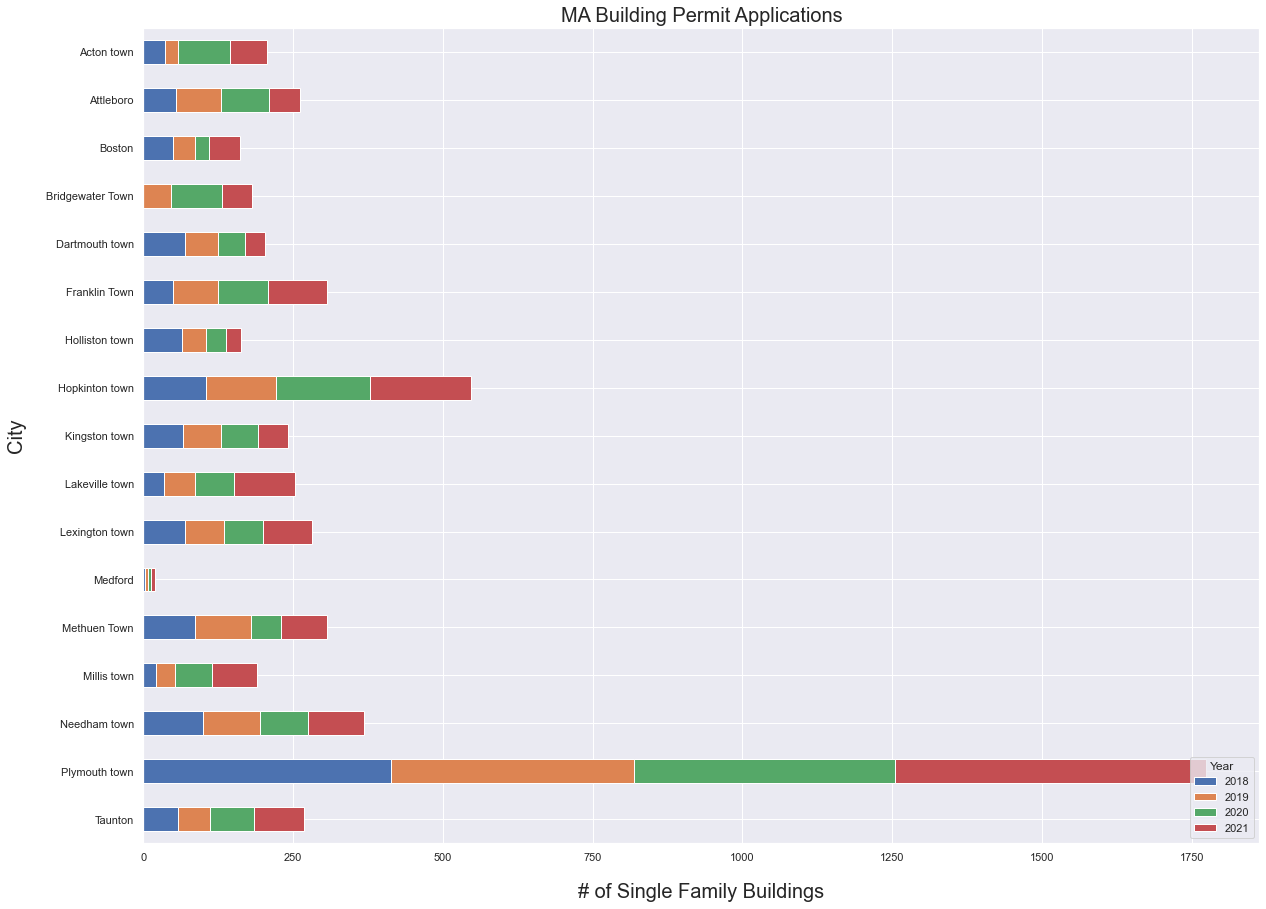

In [69]:
ax = top_singlepiv.plot.barh(stacked = True, \
                        figsize = [20,15], \
                        title = 'MA Building Permit Applications')
ax.set_xlabel('# of Single Family Buildings', fontsize = 20, labelpad = 20 )
    #labelpad provides more space between xlabel and xticks
ax.set_ylabel('City', fontsize = 20, labelpad = 20)
plt.yticks(rotation = 0)
ax.invert_yaxis() #plots bar graph in descending order
ax.set_title('MA Building Permit Applications', fontsize = 20)
ax.legend(title = 'Year', loc = 4)

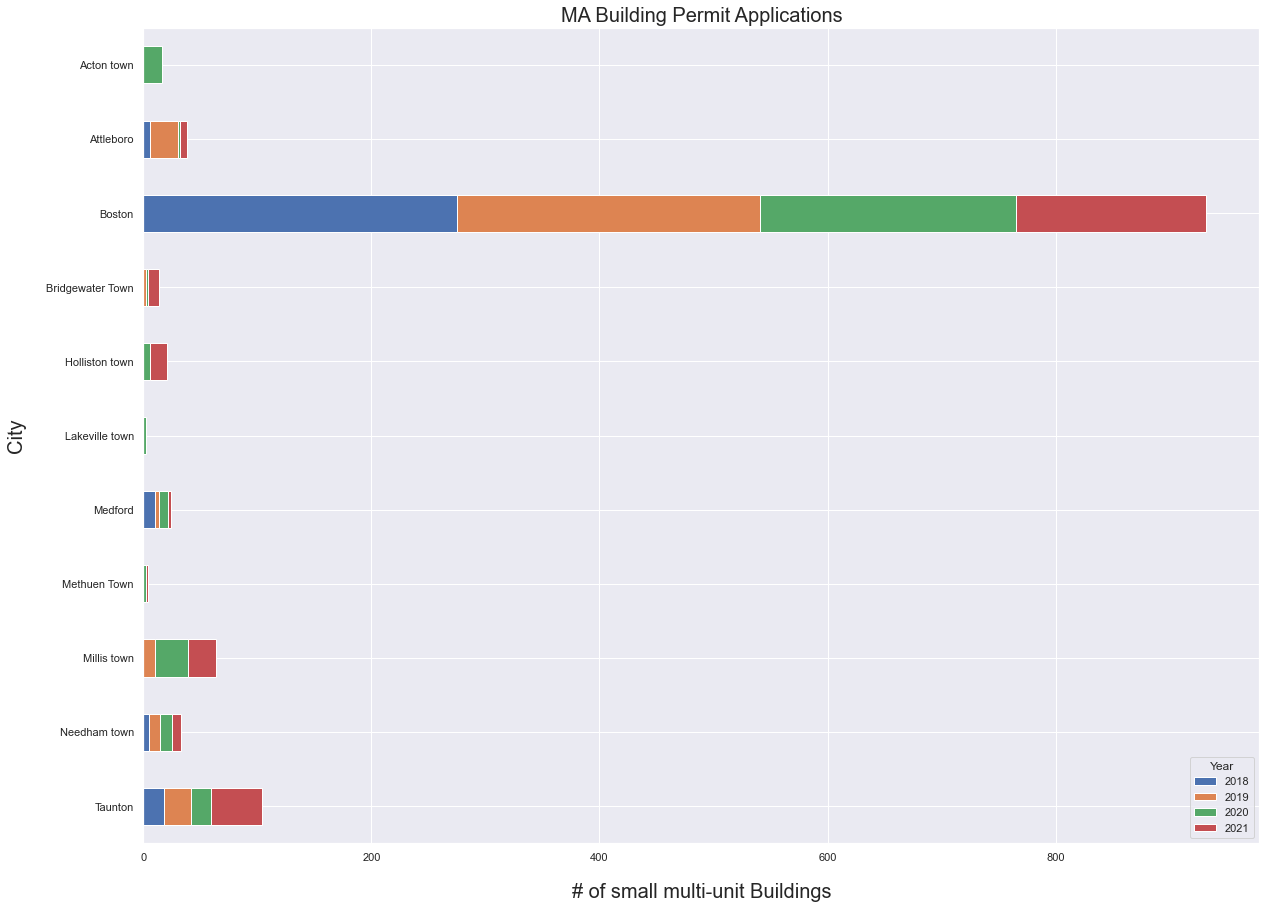

In [70]:
ax = top_smallpiv.plot.barh(stacked = True, \
                        figsize = [20,15], \
                        title = 'MA Building Permit Applications')
ax.set_xlabel('# of small multi-unit Buildings', fontsize = 20, labelpad = 20 )
    #labelpad provides more space between xlabel and xticks
ax.set_ylabel('City', fontsize = 20, labelpad = 20)
plt.yticks(rotation = 0)
ax.invert_yaxis() #plots bar graph in descending order
ax.set_title('MA Building Permit Applications', fontsize = 20)
ax.legend(title = 'Year', loc = 4)

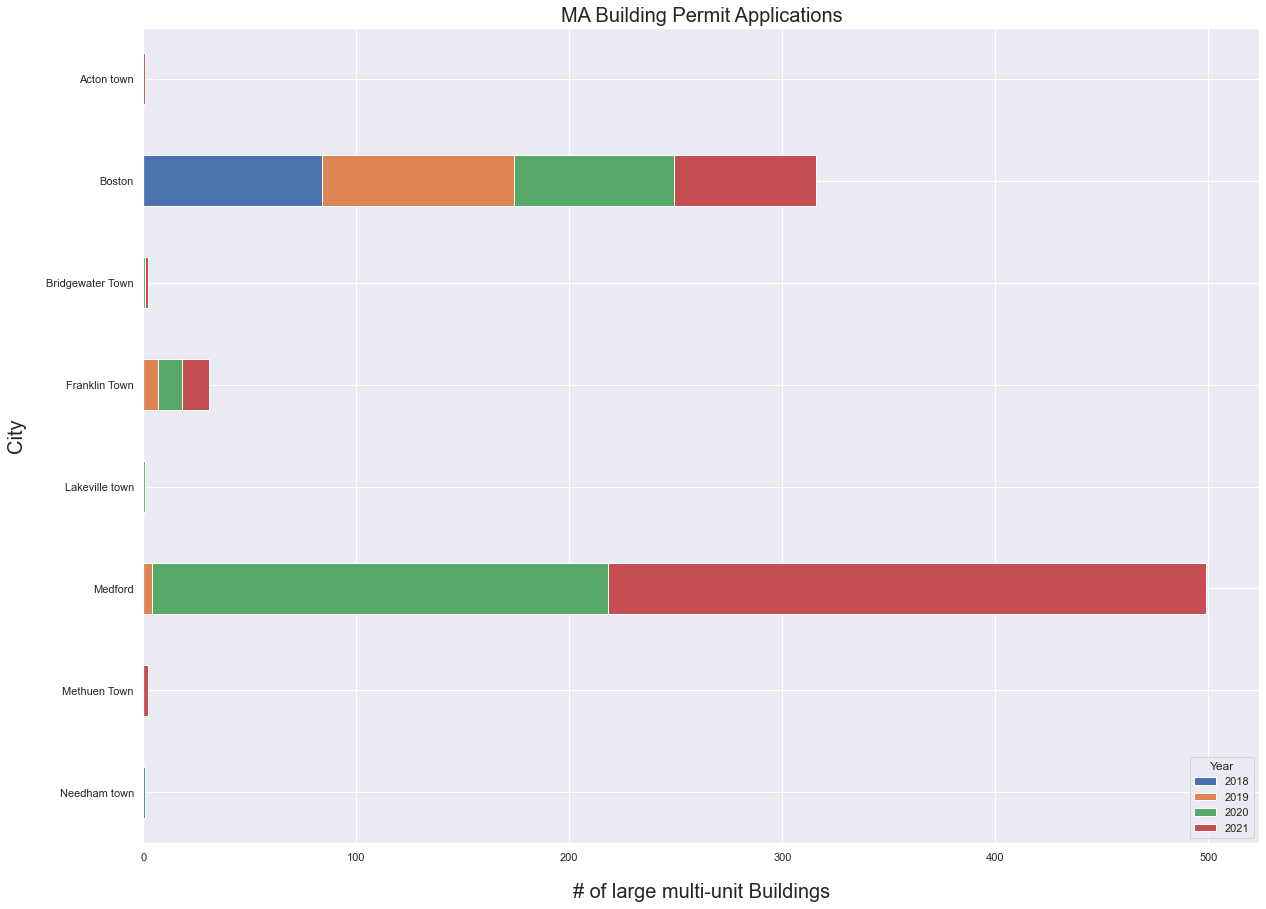

In [71]:
ax = top_lrgepiv.plot.barh(stacked = True, \
                        figsize = [20,15], \
                        title = 'MA Building Permit Applications')
ax.set_xlabel('# of large multi-unit Buildings', fontsize = 20, labelpad = 20 )
    #labelpad provides more space between xlabel and xticks
ax.set_ylabel('City', fontsize = 20, labelpad = 20)
plt.yticks(rotation = 0)
ax.invert_yaxis() #plots bar graph in descending order
ax.set_title('MA Building Permit Applications', fontsize = 20)
ax.legend(title = 'Year', loc = 4)

# Hypothesis Testing

Did towns within urban areas see a statistical difference in building permit submissions vs towns in urban places before and after the covid lock down? Null hypothesis is that there is no difference.

Another hypothesis is that urban areas saw the largest impact on building permit applications because these locations with larger populations had stricter lock down requirements than places with smaller populations. As we experienced, lock downs and mask requirements were first seen in the largest cities such as Boston then these requirements were later adopted by smaller towns. This may be due to the covid transmission rates; larger denser populations = higher rates of transmission

Another hypothesis is that some places feared that the building department would be indefinitely be closed and no longer accept applications. From working during that time, there was a big push to rush permit drawings that were almost ready to hopefully get approved. Places with big developement planned would most likely experience this (Medford with the green line extension).

# Loading in MA Shape file

In [72]:
#ma_map = gdp.read_file(r'C:\Users\sjauy\Python\HODP\building_permit_analysis\permit_env\shape files\TOWNSSURVEY_POLY.shp')